In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


In [2]:
df = pd.read_csv("../data/raw/AAPL_raw.csv", parse_dates=["Date"], index_col="Date")

In [3]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2024-09-05,221.349823,224.435453,220.493806,220.603297,36615400
2024-09-06,219.797073,224.196596,218.751934,222.912564,48423000
2024-09-09,219.886627,220.244960,215.706087,219.797048,67180000
2024-09-10,219.090363,220.454011,215.726015,217.905873,51591000
2024-09-11,221.628525,222.056526,216.880618,220.434087,44587100
...,...,...,...,...,...
2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700
2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400
2025-09-02,229.720001,230.850006,226.970001,229.250000,44075600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-05 to 2025-09-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Open    250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


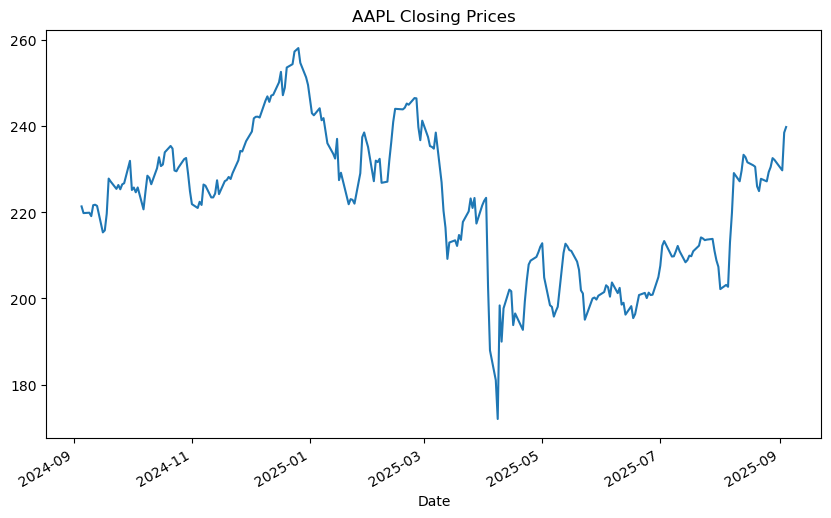

In [5]:
df['Close'].plot(title="AAPL Closing Prices", figsize=(10, 6))
plt.show()

In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,221.848161,224.063458,219.290411,221.518761,5.390189e+07
std,16.105912,15.590048,16.312209,16.057261,2.776260e+07
min,171.998993,189.875235,168.796839,171.530131,2.323470e+07
25%,209.774426,211.763700,207.578693,209.734468,3.948688e+07
50%,223.820450,225.523932,221.742839,223.524720,4.674245e+07
75%,232.533699,234.716437,229.904636,232.508652,5.681858e+07
max,258.103729,259.179926,256.718662,257.276679,3.186799e+08


In [7]:
date_diff = df.index.to_series().diff().value_counts()
date_diff

Date
1 days    192
3 days     46
4 days      6
2 days      5
Name: count, dtype: int64

In [8]:
# Check missing/nulls
df.isna().sum()


Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [16]:
# Sort, drop dups, forward-fill
df = df.sort_index()
df = df[~df.index.duplicated()]
df = df.ffill().dropna()

df.info()        # confirm no NaNs


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-09-05 to 2025-09-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   250 non-null    float64
 1   High    250 non-null    float64
 2   Low     250 non-null    float64
 3   Open    250 non-null    float64
 4   Volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [21]:
df["Daily_Return"] = df["Close"].pct_change()
df["Log_Return"]  = np.log(df["Close"] / df["Close"].shift(1))
df["MA_20"] = df["Close"].rolling(20).mean()
df["MA_50"] = df["Close"].rolling(50).mean()

In [23]:
df.tail()

,Close,High,Low,Open,Volume,Daily Return,Daily_Return,Log_Return,MA_20,MA_50
Date,,,,,,,,,,
2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700,0.008981,0.008981,0.008941,224.200442,214.665730
2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400,-0.001806,-0.001806,-0.001808,225.699912,215.381387
2025-09-02,229.720001,230.850006,226.970001,229.250000,44075600,-0.010425,-0.010425,-0.010479,227.029938,215.960344
2025-09-03,238.470001,238.850006,234.360001,237.210007,66427800,0.038090,0.038090,0.037382,228.818940,216.704312
2025-09-04,239.779999,239.899994,236.740005,238.449997,47504000,0.005493,0.005493,0.005478,230.157527,217.498454


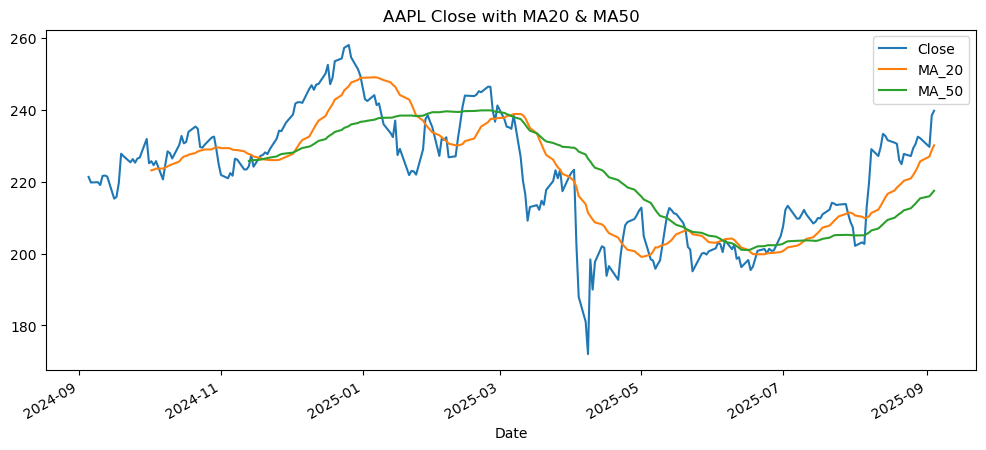

In [24]:
df[["Close","MA_20","MA_50"]].plot(figsize=(12,5), title="AAPL Close with MA20 & MA50")
plt.show()

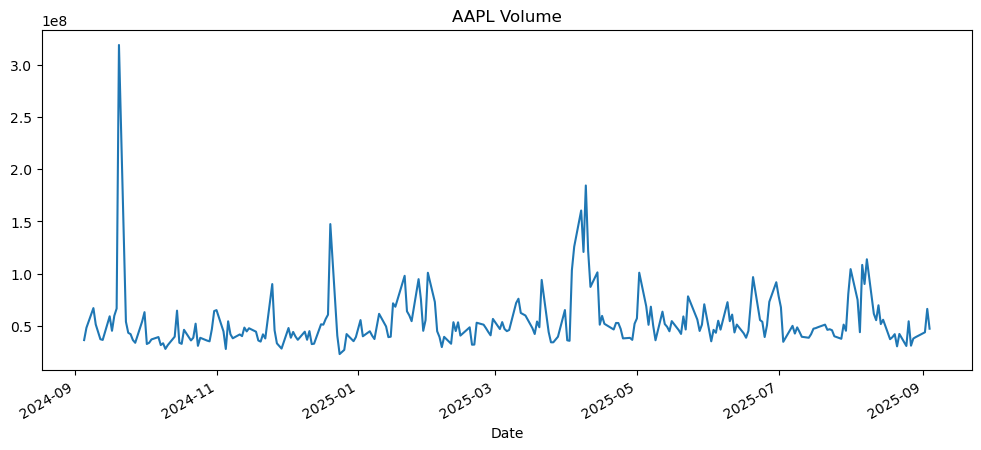

In [80]:
df['Volume'].plot(figsize=(12,5), title="AAPL Volume")
plt.show()

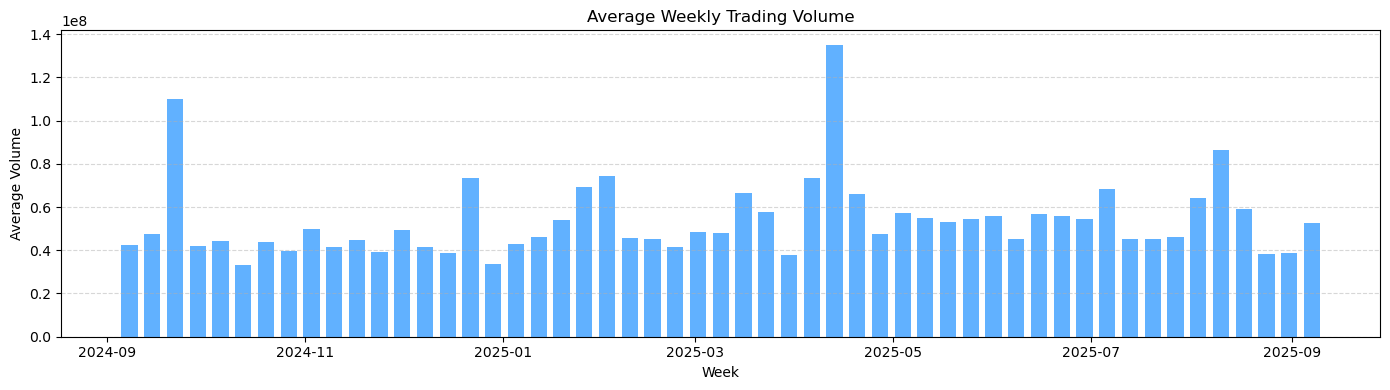

In [ ]:
# Plot average weekly trading volume as a bar chart for better clarity

df_weekly = df['Volume'].resample('W').mean()  # Resample to weekly average

plt.figure(figsize=(14, 4))
plt.bar(df_weekly.index, df_weekly.values, width=5, color='dodgerblue', alpha=0.7)
plt.title('Average Weekly Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Week')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

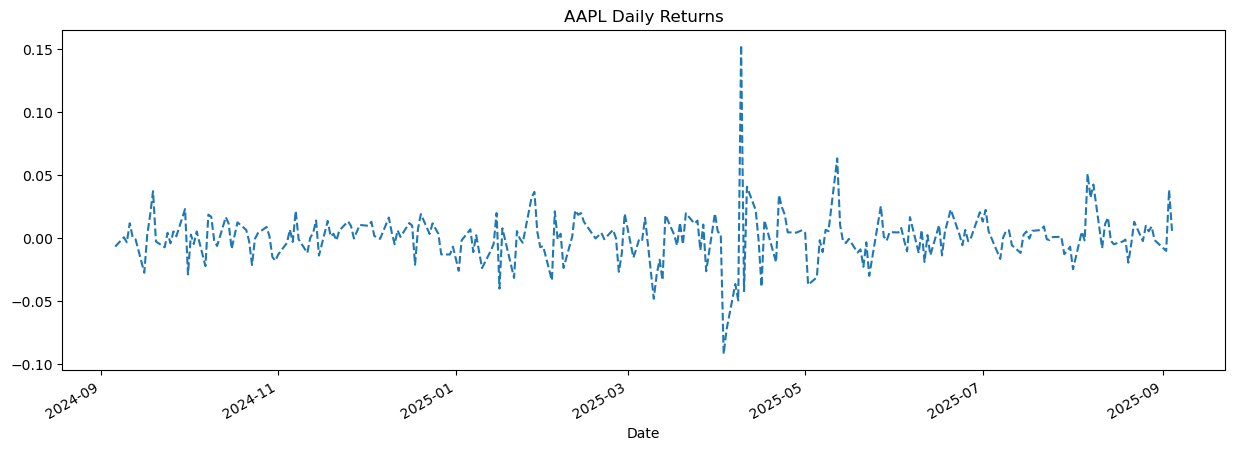

In [45]:
df['Daily_Return'].plot(figsize=(15,5), title="Daily Returns", linestyle='--')
plt.show()

Text(0.5, 1.0, 'Avg Daily Returns')

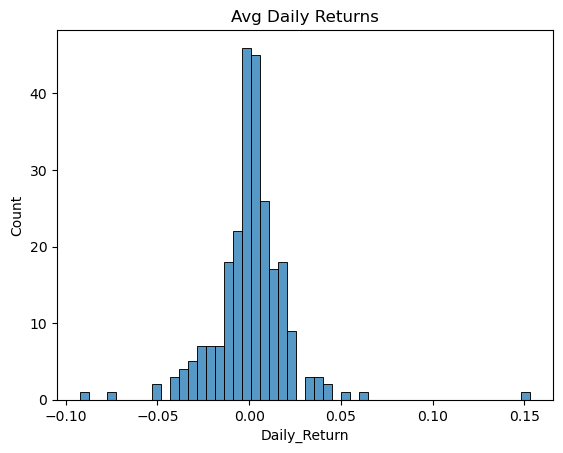

In [48]:
import seaborn as sns
sns.histplot(df['Daily_Return'], bins=50)
plt.title("Avg Daily Returns")

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

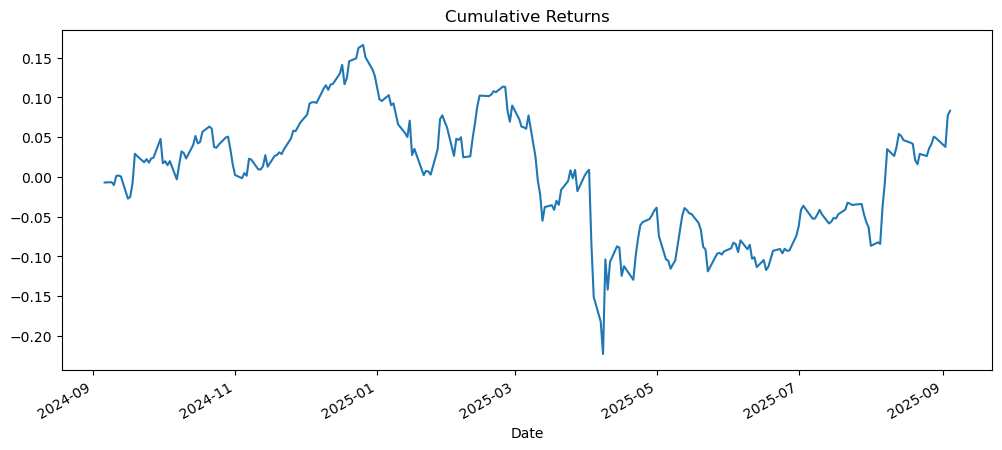

In [49]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1
df['Cumulative_Return'].plot(figsize=(12,5), title="Cumulative Returns")

In [56]:
df

,Close,High,Low,Open,Volume,Daily Return,Daily_Return,Log_Return,MA_20,MA_50,Cumulative_Return
Date,,,,,,,,,,,
2024-09-05,221.349823,224.435453,220.493806,220.603297,36615400,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-06,219.797073,224.196596,218.751934,222.912564,48423000,-0.007015,-0.007015,-0.007040,NaN,NaN,-0.007015
2024-09-09,219.886627,220.244960,215.706087,219.797048,67180000,0.000407,0.000407,0.000407,NaN,NaN,-0.006610
2024-09-10,219.090363,220.454011,215.726015,217.905873,51591000,-0.003621,-0.003621,-0.003628,NaN,NaN,-0.010208
2024-09-11,221.628525,222.056526,216.880618,220.434087,44587100,0.011585,0.011585,0.011518,NaN,NaN,0.001259
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28,232.559998,233.410004,229.339996,230.820007,38074700,0.008981,0.008981,0.008941,224.200442,214.665730,0.050645
2025-08-29,232.139999,233.380005,231.369995,232.509995,39418400,-0.001806,-0.001806,-0.001808,225.699912,215.381387,0.048747
2025-09-02,229.720001,230.850006,226.970001,229.250000,44075600,-0.010425,-0.010425,-0.010479,227.029938,215.960344,0.037814


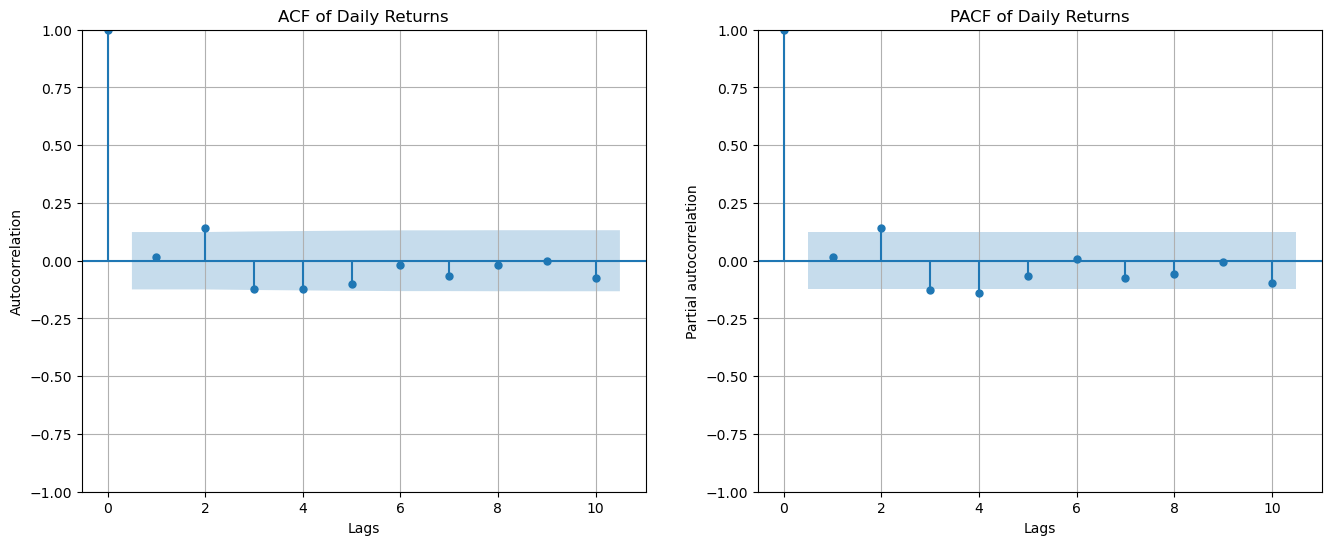

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plot_acf(df['Daily_Return'].dropna(), lags=10, ax=axes[0])
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("Autocorrelation")
axes[0].set_title("ACF of Daily Returns")
axes[0].grid(True)

plot_pacf(df['Daily_Return'].dropna(), lags=10, ax=axes[1])
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Partial autocorrelation")
axes[1].set_title("PACF of Daily Returns")
axes[1].grid(True)

plt.show()


<Axes: title={'center': 'Rolling 10-day Volatility'}, xlabel='Date'>

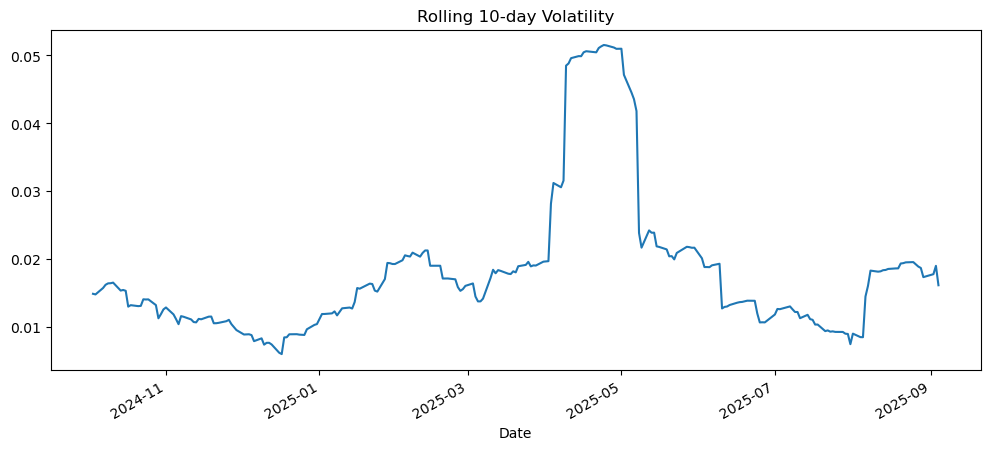

In [ ]:
df['Daily_Return'].rolling(10).std().plot(figsize=(12,5), title="Rolling 10-day Volatility")

In [31]:
PROC = Path("../data/processed")
PROC.mkdir(exist_ok=True, parents=True)
out = PROC / "AAPL_clean.csv"
df.dropna().to_csv(out)
print(f"Saved cleaned → {out}")


Saved cleaned → ..\data\processed\AAPL_clean.csv
